In [1]:
import os
from pcxarray import pc_query, prepare_data
from pcxarray.utils import load_census_shapefile
from distributed import Client
import matplotlib.pyplot as plt

In [2]:
states_gdf = load_census_shapefile(level='state', verify=False)
ms_gdf = states_gdf[states_gdf['NAME'] == 'Mississippi']
ms_gdf = ms_gdf.to_crs(epsg=3814)
geom = ms_gdf.geometry.union_all()

Found 10 items in the GNATSGO collection.


<Axes: >

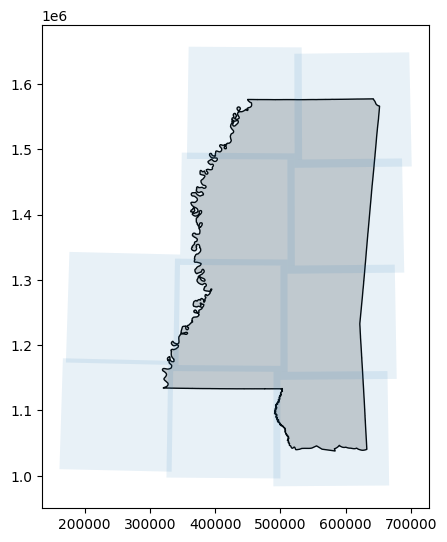

In [ ]:
items_gdf = pc_query(
    collections='gnatsgo-rasters',
    geometry=geom,
    crs=ms_gdf.crs,
)
print(f"Found {len(items_gdf)} items in the GNATSGO collection.")

fig, ax = plt.subplots(figsize=(5, 10))
ms_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
items_gdf.plot(ax=ax, alpha=0.1)
plt.show()

In [4]:
client = Client(n_workers=os.cpu_count() // 2, memory_limit="8GB")
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 12
Total threads: 24,Total memory: 89.41 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41763,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:45965,Total threads: 2
Dashboard: http://127.0.0.1:44035/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:34019,


In [ ]:
nccpi_da = prepare_data(
    items_gdf,
    geometry=geom,
    crs=ms_gdf.crs,
    bands=['nccpi3corn', 'nccpi3cot', 'nccpi3soy'],
    enable_progress_bar=True,
    target_resoution=100,
    chunks={'x': 4098, 'y': 4098},
    masked=True
)

Merging tiles:  10%|█         | 1/10 [00:19<02:52, 19.14s/tiles]/home/dh2306/pcxarray/.venv/lib/python3.12/site-packages/distributed/client.py:3363: UserWarning: Sending large graph of size 354.17 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/dh2306/pcxarray/.venv/lib/python3.12/site-packages/distributed/client.py:3363: UserWarning: Sending large graph of size 274.89 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
Merging tiles:  20%|██        | 2/10 [01:11<05:09, 38.69s/tiles]/home/dh2306/pcxarray/.ven